In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from courses import *

def generateSlopes(course, meters):
    return np.array([course(i) for i in range(meters)])

def generateElevation(course, meters):
    slopes = generateSlopes(course, meters)
    return np.cumsum(slopes/100)


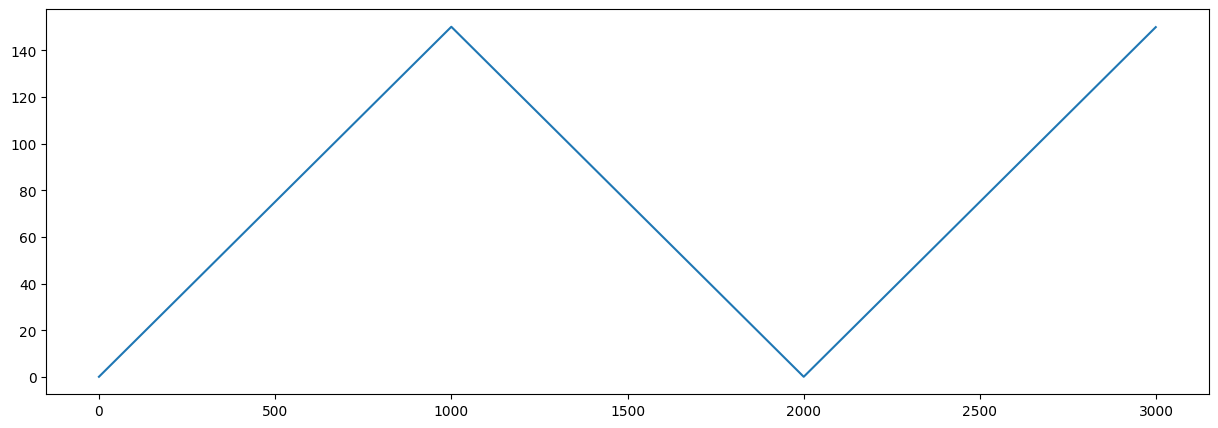

In [2]:
tenByOneKmElevation = generateElevation(tenByOneKm, 3000)

plt.figure(figsize=(15, 5))  # Set the figsize to adjust the width and height of the plot
plt.plot(tenByOneKmElevation)
plt.show()


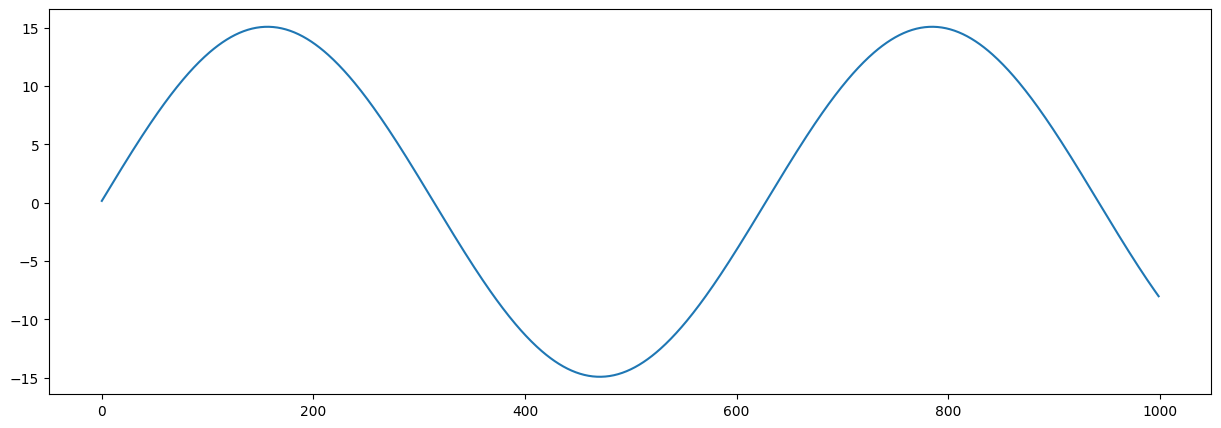

In [3]:
rollingHillsElevation = generateElevation(rollingHills, 1000)

plt.figure(figsize=(15, 5))

plt.plot(rollingHillsElevation)

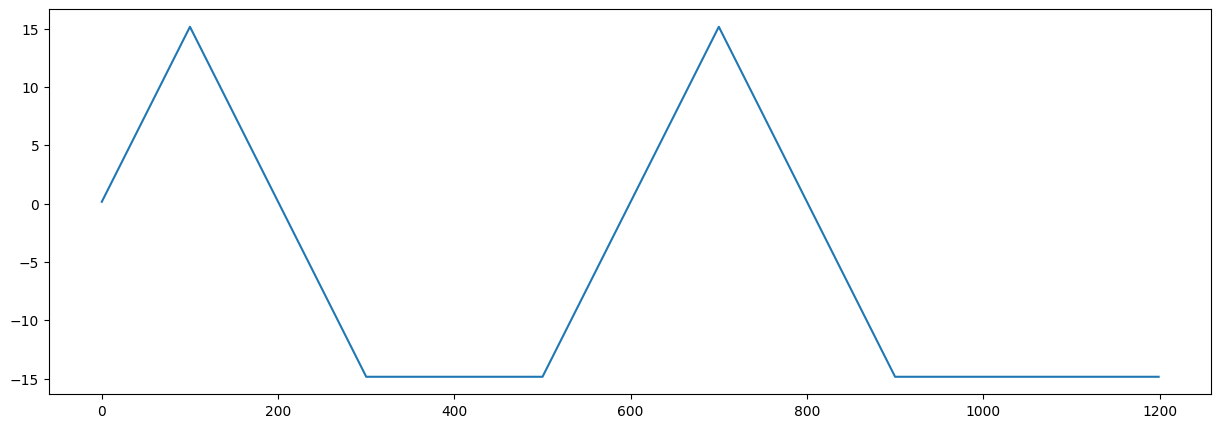

In [4]:
shortTestElevation = generateElevation(shortTest, 1200)

plt.figure(figsize=(15, 5))
plt.plot(shortTestElevation)